### Load Raw Data

First we will check the data_loader works correctly by loading a csv file of anonymized credit card data that contains valid and fraudulent transactions by loading the csv and printing the head rows in the dataframe.

In [1]:
import matplotlib.pyplot as plt

from src.data_loader import load_csv


dataframe = load_csv('../data/raw/creditcard.csv')
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



### Inspect Dataset Shape and Columns

Check the number of rows and columns

In [2]:
dataframe.shape

(284807, 31)

List of dataframe columns

In [3]:
dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Check for Missing Values

We will now verify if there are any missing values in the dataset. Handling missing data is crucial before performing any preprocessing or modeling.

In [4]:
dataframe.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Inspect Class Distribution (Fraud vs Normal)

The dataset contains a 'Class' column where 0 indicates a valid transaction and 1 indicates a fraudulent transaction. We will check the distribution to understand the imbalance.

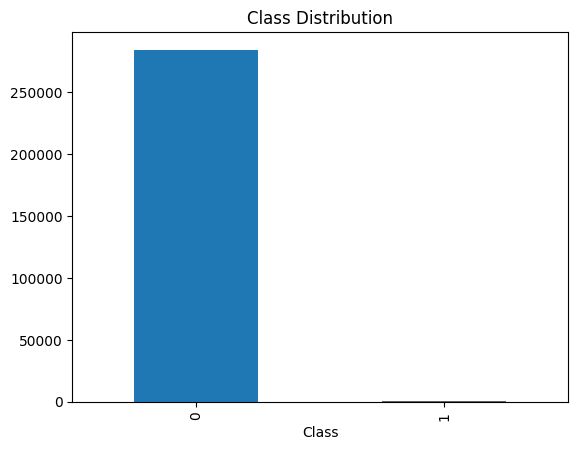

In [5]:
dataframe['Class'].value_counts()

dataframe['Class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

* This helps illustrate the extreme imbalance that is important to the detection of anomalies.

### Quick Statistical Summary
We generate a quick statistical summary of the dataset to understand the ranges, means, and variance of numeric features.

In [6]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* This shows the count, mean, std, min, and max for each column.
* This is useful for spotting anomalies or unusual values.

### Inspect a Range of Rows

We can also inspect a range of rows to manually check for unusual transactions.

In [7]:
# Rows 1000 to 1010
dataframe.iloc[1000:1010]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1000,756.0,-1.372406,0.920122,-0.776930,0.900529,0.743475,-0.958746,0.525096,0.059402,-0.169125,...,-0.023181,0.513865,0.526689,-0.436925,-0.390496,-0.356481,0.187411,0.193365,2.69,0
1001,756.0,1.183743,0.115571,0.846517,0.928534,-0.539676,-0.119024,-0.418418,0.145655,0.167487,...,-0.034568,-0.129033,0.011820,-0.032545,0.322960,-0.507392,0.042921,0.022444,2.50,0
1002,756.0,1.225902,0.239667,0.170021,0.508587,-0.202827,-0.567680,-0.051293,-0.007250,-0.126288,...,-0.260501,-0.824388,0.077032,-0.056429,0.210946,0.098812,-0.031763,0.017100,7.28,0
1003,758.0,1.195191,0.164982,0.608915,0.653734,-0.511610,-0.725919,-0.055123,-0.049900,0.119843,...,-0.216482,-0.623974,0.215072,0.376696,0.078802,0.106358,-0.016346,0.017350,0.99,0
1004,758.0,1.152071,0.119097,0.515410,1.480148,-0.443249,-0.406771,-0.041662,0.056781,0.512394,...,-0.102444,-0.124814,0.002774,0.376727,0.567602,-0.326992,0.030923,0.014867,2.49,0
1005,758.0,-3.059533,1.828599,-0.272524,-2.518533,-0.433718,-0.999147,-0.300953,-3.212499,2.258083,...,2.790298,-0.702683,0.626516,0.326940,0.131713,-0.104649,0.649376,0.114990,1.00,0
1006,758.0,0.530478,-1.587017,1.148280,0.709524,-1.621195,0.762713,-0.793154,0.417672,1.430482,...,0.248559,0.477354,-0.306784,0.346177,0.135532,1.200627,-0.057387,0.047753,291.38,0
1007,759.0,1.130109,-0.204418,0.868317,1.531755,-0.318637,1.070985,-0.553303,0.342627,1.327647,...,-0.469380,-0.885483,-0.022070,-0.775433,0.531546,-0.457121,0.088653,0.020612,15.00,0
1008,760.0,1.047174,0.287738,0.364303,2.233527,0.157587,0.284012,0.105707,0.081059,-0.940673,...,-0.204318,-0.881569,-0.038847,-0.553368,0.297419,-0.240085,-0.026894,0.023765,82.39,0
1009,761.0,-0.541113,-2.205570,-0.007072,2.910651,-0.380710,1.909774,0.621835,0.379113,-0.654415,...,0.382527,-0.630142,-0.407536,-0.976207,-0.436080,-0.213135,-0.073661,0.155397,792.20,0


* This is helpful if you want to spot check for anomalies before modeling.

### Generate CSV With Fraud Anomalies For Clarity

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os

# Ensure output directory exists
os.makedirs("../data/raw", exist_ok=True)

# -------------------------------
# 1. Generate normal transactions
# -------------------------------

np.random.seed(8675309)
num_normal = 5000
num_anomalies = 120

# Generate timestamps in 1 minute increments
start_time = datetime(2025, 1, 1)
timestamps = [start_time + timedelta(minutes=1) for i in range(num_normal + num_anomalies)]

# Customer IDs
customer_ids = np.random.randint(1000, 9999, size=num_normal)

# Normal transactions amounts with a skewed distribution
amounts = np.random.exponential(scale=40, size=num_normal)
amounts = np.round(amounts, 2)

categories = np.random.choice(
    ["grocery", "fuel", "tech", "restaurant", "pharmacy", "travel"],
    size=num_normal,
    p=[0.35, 0.15, 0.10, 0.20, 0.10, 0.10]
)

# Normal dataset
normal_df = pd.DataFrame({
    "timestamp": timestamps[:num_normal],
    "customer_id": customer_ids,
    "amount": amounts,
    "category": categories,
    "status": 0   # 0 = normal
})

# --------------------------------
# 2. Generate anomaly transactions
# --------------------------------

# 2A. Extremely large amounts
large_amounts = np.random.uniform(2000, 10000, size=40)

# 2B. Impossible negative values
negative_amounts = np.random.uniform(-500, -1, size=30)

# 2C. Frequency burst (sane customer, rapid-fire)
burst_customer = np.random.randint(1000, 9999)
burst_amounts = np.random.uniform(150, 600, size=30)

# 2D. Zero-dollar transactions
zero_amounts = np.zeros(20)

anomaly_amounts = np.concatenate([large_amounts, negative_amounts, burst_amounts, zero_amounts])
np.random.shuffle(anomaly_amounts)

anomaly_catagories = np.random.choice(
    ["grocery", "fuel", "tech", "restaurant", "pharmacy", "travel"],
    size=num_anomalies
)

anomaly_dataframe = pd.DataFrame(
    {
        "timestamp": timestamps[num_normal:],  # Placed after the normal timestamps
        "customer_id": np.random.randint(2000, 9999, size=num_anomalies),
        "amount": np.round(anomaly_amounts, 2),
        "category": anomaly_catagories,
        "status": 1  # 1 = anomaly
    }
)

# Force burst anomaly pattern
burst_indices = anomaly_dataframe.sample(30).index
anomaly_dataframe.loc[burst_indices, "customer_id"] = burst_customer

# ----------------------
# 3. Combine and shuffle
# ----------------------

synthetic_dataframe = pd.concat([normal_df, anomaly_dataframe], ignore_index=True)
synthetic_dataframe = synthetic_dataframe.sample(frac=1, random_state=8675309).reset_index(drop=True)

# ----------------
# 4. Save to repo
# ----------------

output_path = "../data/raw/synthetic_transactions.csv"
synthetic_dataframe.to_csv(output_path, index=False)

output_path

'../data/raw/synthetic_transactions.csv'

### Synthetic Transaction Anomaly Dataset

This dataset supplements the Kaggle credit card fraud data by providing **visually obvious anomalies** that are easy to inspect.

The anomalies included are domain-aware transaction issues such as:

- Extremely large transaction amounts
- Impossible negative values
- Rapid-fire transactions from a single customer
- Zero-dollar transactions
- Category inconsistencies

These anomalies help illustrate how preprocessing, visualization, and modeling detect unusual patterns. In contrast, the Kaggle dataset contains *real anomalies* (fraud), but they are subtle and not visually detectable without modeling.

In [9]:
from src.data_loader import load_csv


dataframe_syn = load_csv("../data/raw/synthetic_transactions.csv")
dataframe_syn.head(50)

,timestamp,customer_id,amount,category,status
0,2025-01-01 00:01:00,5725,54.30,tech,0
1,2025-01-01 00:01:00,5163,42.86,fuel,0
2,2025-01-01 00:01:00,9513,9.20,travel,0
3,2025-01-01 00:01:00,7762,58.14,grocery,0
4,2025-01-01 00:01:00,5512,3.06,travel,0
5,2025-01-01 00:01:00,3983,29.86,grocery,0
6,2025-01-01 00:01:00,4290,5.53,grocery,0
7,2025-01-01 00:01:00,1621,94.66,grocery,0
8,2025-01-01 00:01:00,6353,14.48,pharmacy,0
9,2025-01-01 00:01:00,6615,78.84,travel,0


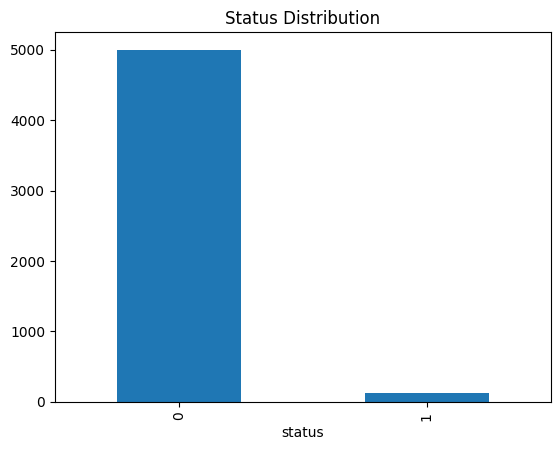

In [10]:
dataframe_syn['status'].value_counts()

dataframe_syn['status'].value_counts().plot(kind='bar', title='Status Distribution')
plt.show()

### Zero amounts

Showing all anomalies that are zero

In [11]:
zero_amounts_dataframe = dataframe_syn[dataframe_syn['amount'] == 0]

total_zero_rows = (dataframe_syn['amount'] == 0).sum()
print(f'Total zero rows: {total_zero_rows}')

zero_amounts_dataframe.head()

Total zero rows: 22


,timestamp,customer_id,amount,category,status
92,2025-01-01 00:01:00,8579,0.0,grocery,1
220,2025-01-01 00:01:00,8579,0.0,pharmacy,1
257,2025-01-01 00:01:00,3939,0.0,tech,1
531,2025-01-01 00:01:00,4457,0.0,grocery,1
913,2025-01-01 00:01:00,5130,0.0,pharmacy,1
